<a href="https://colab.research.google.com/github/HJuliamPR/OracleChallengeTelecomX_ML/blob/main/ML_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X – Parte 2: Predicción de Cancelación (Churn)

📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 Lo que vas a practicar

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico

🚀 Ahora eres: Analista Junior de Machine Learning

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!

# Preparación de los Datos

1. Hacer un modelo de predicción de los valores

## Extracción del Archivo Tratado

In [22]:
import pandas as pd

url = 'https://raw.githubusercontent.com/HJuliamPR/OracleChallengeTelecomX_ML/refs/heads/main/df_TelecomeX.csv'
df = pd.read_csv(url)
display(df.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


## Eliminación de Columnas Irrelevantes

In [23]:
df = df.drop('customerID', axis=1)
display(df.head())

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


Por ahora solo podemos decir que la la variable CustomerID no sirve para el modelo. Se tendrán que hacer análisis estadísticos y pruebas del modelo para descartar otras variables.

## Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Identificar columnas categóricas (excluyendo la variable objetivo 'Churn')
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Churn' in columnas_categoricas:
    columnas_categoricas.remove('Churn')

# Inicializar OneHotEncoder
# handle_unknown='ignore' ignorará las categorías no vistas durante la transformación
# sparse_output=False devolverá un array denso
codificador_onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajustar y transformar las características categóricas
caracteristicas_codificadas = codificador_onehot.fit_transform(df[columnas_categoricas])

# Crear un DataFrame a partir de las características codificadas
df_codificado_categoricas = pd.DataFrame(caracteristicas_codificadas, columns=codificador_onehot.get_feature_names_out(columnas_categoricas))

# Eliminar las columnas categóricas originales del DataFrame original
df_numerico = df.drop(columns=columnas_categoricas)

# Concatenar el DataFrame numérico y el DataFrame codificado
df_codificado = pd.concat([df_numerico, df_codificado_categoricas], axis=1)

# Mostrar las primeras filas del DataFrame codificado
display(df_codificado.head())

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,1,0,0,0,9,1,0,59.9,542.40,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,0,0,4,1,1,73.9,280.85,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,1,1,0,3,1,1,83.9,267.40,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Verificación de la Proporción de Cancelación (Churn)

Proporción de Clientes:


,proportion
Churn,
0,0.734215
1,0.265785


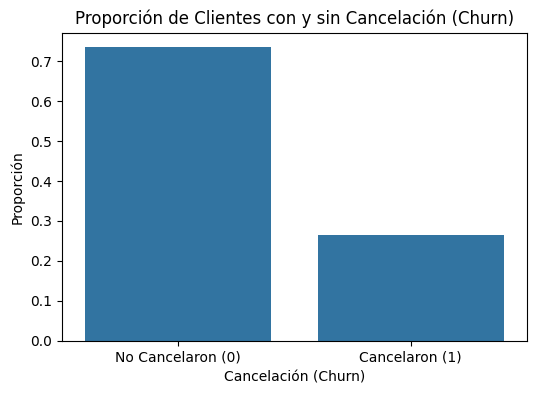

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la proporción de clientes que cancelaron (Churn) vs los que no
proporcion_churn = df_codificado['Churn'].value_counts(normalize=True)

# Mostrar la proporción
print("Proporción de Clientes:")
display(proporcion_churn)

# Crear una gráfica de barras para visualizar la proporción
plt.figure(figsize=(6, 4))
sns.barplot(x=proporcion_churn.index, y=proporcion_churn.values)
plt.title('Proporción de Clientes con y sin Cancelación (Churn)')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Proporción')
plt.xticks(ticks=[0, 1], labels=['No Cancelaron (0)', 'Cancelaron (1)'])
plt.show()

## Balanceo de Clases

Dado el desbalance en la proporción de clientes que cancelan ('Churn') vs. los que no, es crucial balancear las clases. Esto asegura que los modelos predictivos no se sesguen hacia la clase mayoritaria y puedan identificar correctamente a los clientes propensos a cancelar.

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separar las características (X) y la variable objetivo (y)
X = df_codificado.drop('Churn', axis=1)
y = df_codificado['Churn']

# Mostrar la distribución original de las clases
print(f"Distribución original de las clases: {Counter(y)}")

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE para sobremuestrear la clase minoritaria
X_balanceado, y_balanceado = smote.fit_resample(X, y)

# Mostrar la distribución balanceada de las clases
print(f"Distribución balanceada de las clases: {Counter(y_balanceado)}")

# Crear un DataFrame con los datos balanceados
df_balanceado = pd.concat([X_balanceado, y_balanceado], axis=1)

display(df_balanceado.head())

Distribución original de las clases: Counter({0: 5163, 1: 1869})
Distribución balanceada de las clases: Counter({0: 5163, 1: 5163})


,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,...,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,Churn
0,0,0,1,1,9,1,1,65.6,593.30,2.186667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,1,0,0,0,9,1,0,59.9,542.40,1.996667,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,1,0,0,0,4,1,1,73.9,280.85,2.463333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1,1,1,0,13,1,1,98.0,1237.85,3.266667,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0,1,1,0,3,1,1,83.9,267.40,2.796667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


## Balanceo de Clases



Proporción de Clientes (Balanceado):


,proportion
Churn,
0,0.5
1,0.5


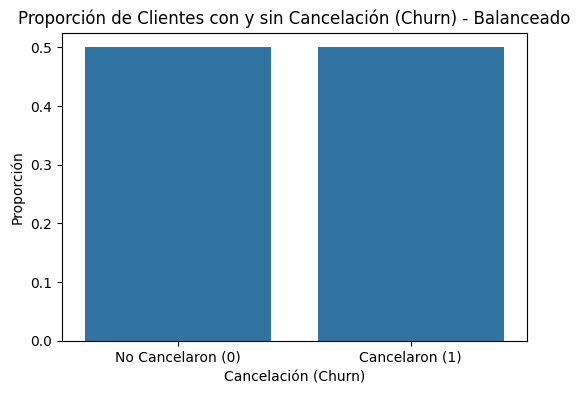

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la proporción de clientes en el DataFrame balanceado
proporcion_balanceada = df_balanceado['Churn'].value_counts(normalize=True)

# Mostrar la proporción balanceada
print("Proporción de Clientes (Balanceado):")
display(proporcion_balanceada)

# Crear una gráfica de barras para visualizar la proporción balanceada
plt.figure(figsize=(6, 4))
sns.barplot(x=proporcion_balanceada.index, y=proporcion_balanceada.values)
plt.title('Proporción de Clientes con y sin Cancelación (Churn) - Balanceado')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Proporción')
plt.xticks(ticks=[0, 1], labels=['No Cancelaron (0)', 'Cancelaron (1)'])
plt.show()

## Normalización o Estandarización (si es necesario)


Para este proyecto, hemos optado por modelos de clasificación que no son sensibles a la escala de los datos, como los modelos basados en árboles (por ejemplo, Decision Tree o Random Forest). Por lo tanto, la normalización o estandarización de las características no es un paso necesario en este caso, lo que simplifica el proceso de preprocesamiento.

# Correlación y Selección de Variables

## Análisis de Correlación

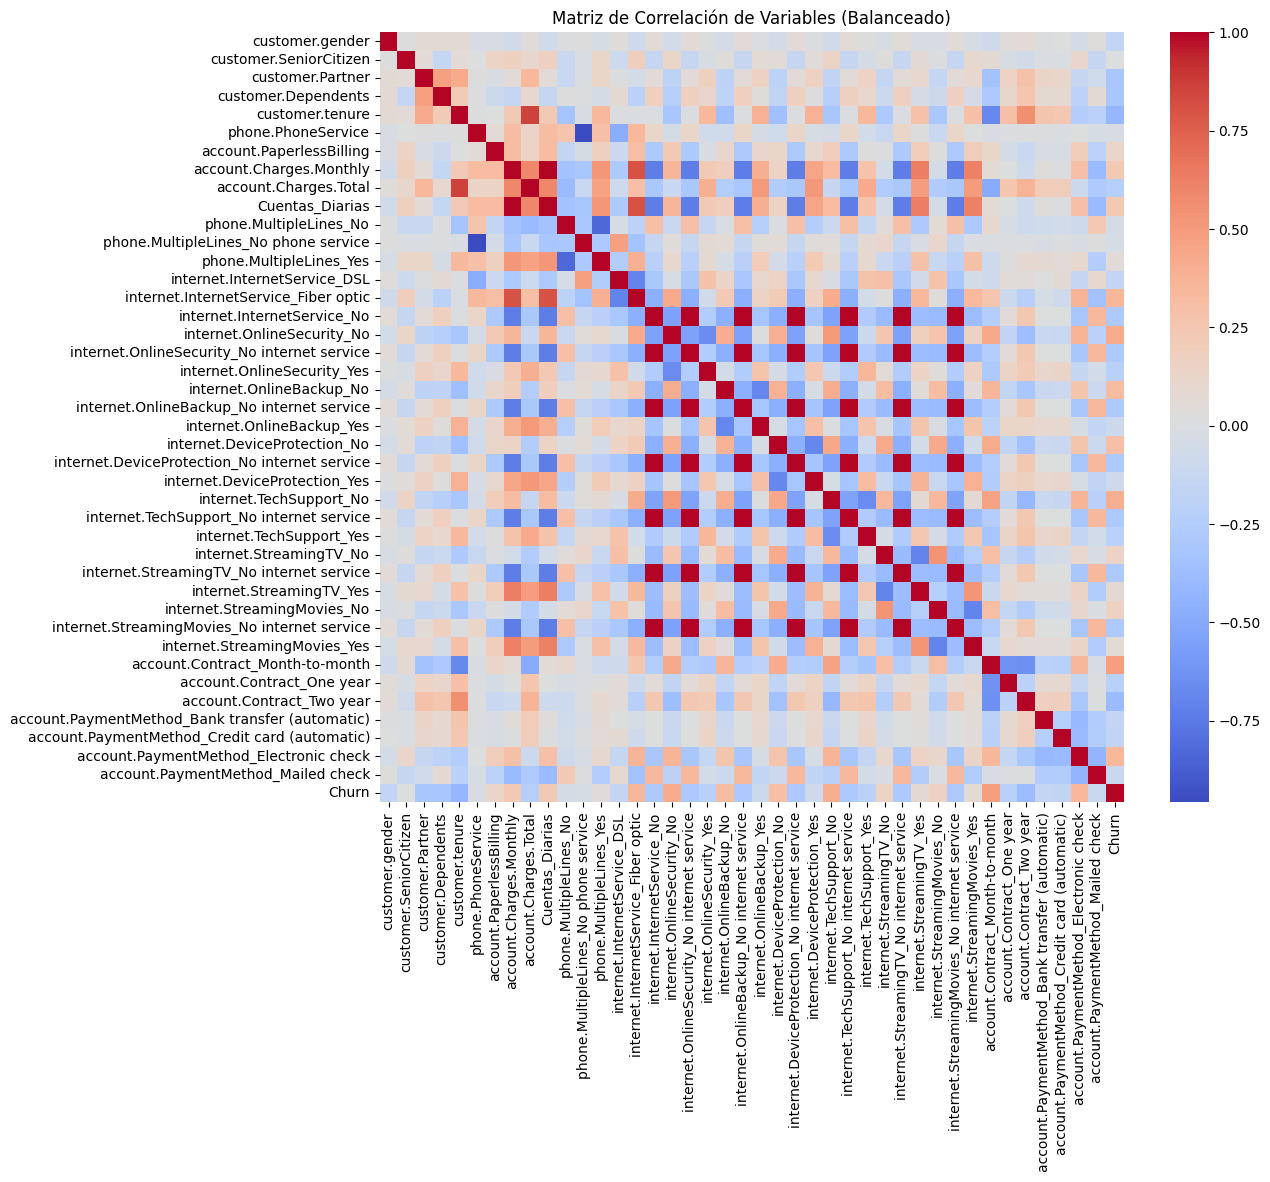

In [28]:
# Calcular la matriz de correlación para el DataFrame balanceado
matriz_correlacion = df_balanceado.corr()

# Mostrar la matriz de correlación (opcional, puede ser muy grande)
# display(matriz_correlacion)

# Crear un mapa de calor (heatmap) para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, cmap='coolwarm', annot=False) # annot=True si quieres ver los valores, pero puede saturar
plt.title('Matriz de Correlación de Variables (Balanceado)')
plt.show()

Al analizar la matriz de correlación, podemos identificar qué variables tienen una relación más fuerte con la probabilidad de que un cliente cancele su servicio ('Churn'). Buscamos variables con coeficientes de correlación (valores en el mapa de calor) más alejados de cero (ya sean positivos o negativos).

Observando la columna 'Churn', podemos identificar algunas variables clave con correlaciones notables:

*   **Correlación Positiva (mayor probabilidad de Churn a medida que aumenta el valor de la variable):**
    *   `account.Contract_Month-to-month`: Una alta correlación positiva indica que los clientes con contratos mes a mes tienen una mayor probabilidad de cancelar.
    *   `internet.InternetService_Fiber optic`: Los clientes con servicio de fibra óptica parecen tener una correlación positiva con la cancelación.
    *   `account.PaymentMethod_Electronic check`: Los pagos con cheque electrónico también muestran una correlación positiva con el *churn*.
    *   `account.Charges.Monthly`: Un mayor cargo mensual está asociado con una mayor probabilidad de cancelación.

*   **Correlación Negativa (menor probabilidad de Churn a medida que aumenta el valor de la variable):**
    *   `customer.tenure`: Una correlación negativa significativa indica que los clientes con mayor antigüedad en la empresa (mayor 'tenure') tienen una menor probabilidad de cancelar.
    *   `account.Contract_Two year`: Los contratos de dos años tienen una correlación negativa fuerte, sugiriendo que estos clientes son menos propensos a irse.
    *   `customer.Partner` y `customer.Dependents`: Tener pareja o dependientes también muestra correlación negativa con el *churn*.

Estas variables con las correlaciones más altas (positivas o negativas) son candidatas fuertes para ser incluidas en el modelo predictivo de *churn*, ya que parecen ser factores importantes que influyen en la decisión de un cliente de cancelar o no. Continuaremos con estas variables para la siguiente etapa de modelado.

## Análisis dirigido

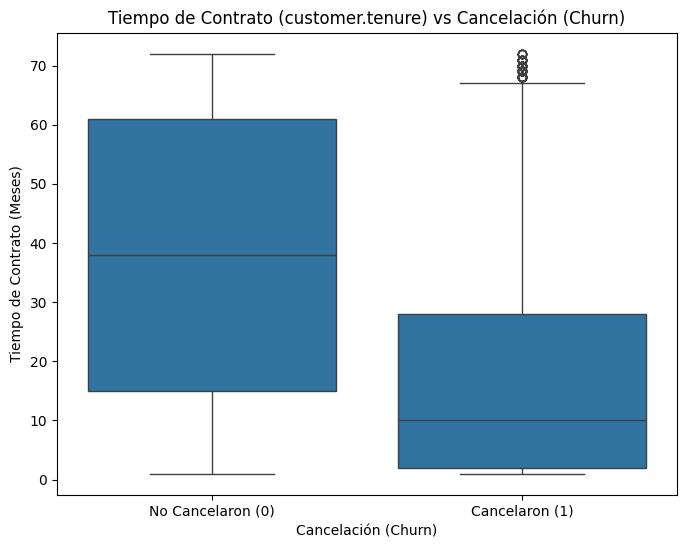

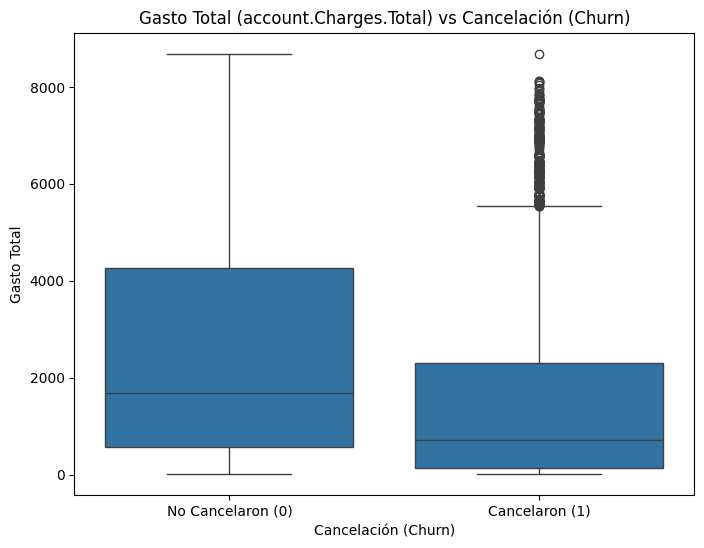

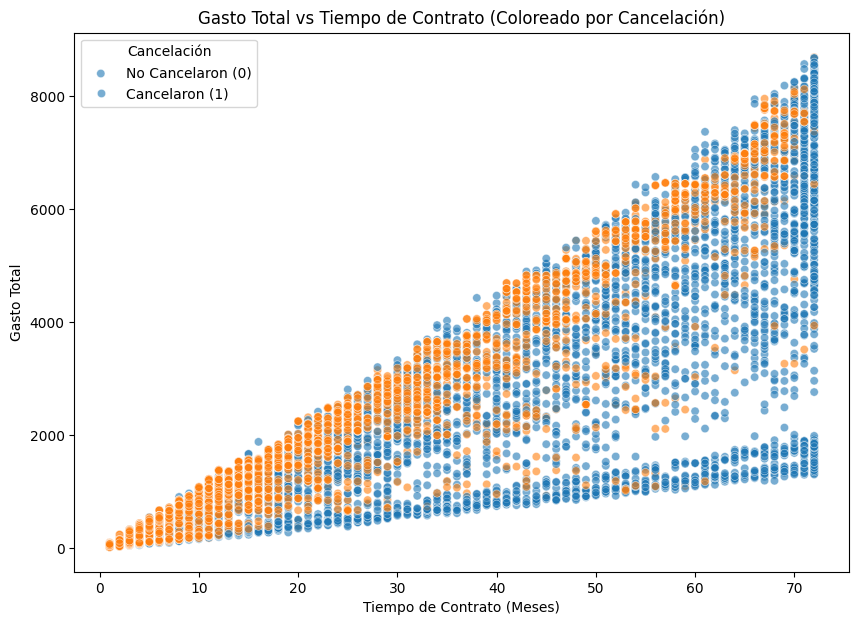

In [29]:
# Análisis dirigido: Tiempo de contrato (customer.tenure) vs Cancelación (Churn) con boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df_balanceado)
plt.title('Tiempo de Contrato (customer.tenure) vs Cancelación (Churn)')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Tiempo de Contrato (Meses)')
plt.xticks(ticks=[0, 1], labels=['No Cancelaron (0)', 'Cancelaron (1)'])
plt.show()

# Análisis dirigido: Gasto total (account.Charges.Total) vs Cancelación (Churn) con boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_balanceado)
plt.title('Gasto Total (account.Charges.Total) vs Cancelación (Churn)')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Gasto Total')
plt.xticks(ticks=[0, 1], labels=['No Cancelaron (0)', 'Cancelaron (1)'])
plt.show()

# Análisis dirigido: Gasto total (account.Charges.Total) vs Tiempo de contrato (customer.tenure) con scatter plot y color por Cancelación (Churn)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df_balanceado, alpha=0.6)
plt.title('Gasto Total vs Tiempo de Contrato (Coloreado por Cancelación)')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Gasto Total')

plt.legend(title='Cancelación', labels=['No Cancelaron (0)', 'Cancelaron (1)'])
plt.show()

A partir de los gráficos de boxplot:

*   **Tiempo de contrato vs. Cancelación:** Se observa que los clientes que cancelan tienden a tener un tiempo de contrato (tenure) significativamente menor en comparación con los clientes que no cancelan. Esto sugiere que los clientes con menos antigüedad son más propensos a irse.

*   **Gasto total vs. Cancelación:** Los clientes que cancelan presentan un gasto total (account.Charges.Total) considerablemente menor que aquellos que permanecen activos. Esto indica que los clientes con menor gasto total acumulado tienen una mayor probabilidad de cancelar su servicio.

# Modelado Predictivo

## Separación de Datos

In [30]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y) del DataFrame balanceado
X_balanceado = df_balanceado.drop('Churn', axis=1)
y_balanceado = df_balanceado['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X_balanceado, y_balanceado, test_size=0.2, random_state=42, stratify=y_balanceado
)

# Mostrar las dimensiones de los conjuntos resultantes
print("Dimensiones del conjunto de entrenamiento (X_entrenamiento):", X_entrenamiento.shape)
print("Dimensiones del conjunto de prueba (X_prueba):", X_prueba.shape)
print("Dimensiones de la variable objetivo de entrenamiento (y_entrenamiento):", y_entrenamiento.shape)
print("Dimensiones de la variable objetivo de prueba (y_prueba):", y_prueba.shape)

Dimensiones del conjunto de entrenamiento (X_entrenamiento): (8260, 41)
Dimensiones del conjunto de prueba (X_prueba): (2066, 41)
Dimensiones de la variable objetivo de entrenamiento (y_entrenamiento): (8260,)
Dimensiones de la variable objetivo de prueba (y_prueba): (2066,)


## Creación de Modelos

## Normalización de Datos para Modelos Sensibles a la Escala

Para entrenar el modelo KNN, que es sensible a la escala de los datos, aplicaremos una normalización a las características. Esto asegurará que todas las variables tengan una escala similar, permitiendo que el cálculo de distancias del algoritmo KNN sea más preciso.

In [31]:
from sklearn.preprocessing import StandardScaler

# Inicializar el normalizador
normalizador = StandardScaler()

# Normalizar solo las características (X) de entrenamiento y prueba
X_entrenamiento_normalizado = normalizador.fit_transform(X_entrenamiento)
X_prueba_normalizado = normalizador.transform(X_prueba)

print("Datos de entrenamiento y prueba normalizados.")

Datos de entrenamiento y prueba normalizados.


## Creación y Entrenamiento del Modelo KNN

Entrenaremos el modelo KNN utilizando los datos normalizados.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar el modelo KNN
# Puedes ajustar el número de vecinos (n_neighbors) si es necesario
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo KNN con los datos de entrenamiento normalizados
modelo_knn.fit(X_entrenamiento_normalizado, y_entrenamiento)

print("Modelo KNN entrenado con datos normalizados.")

Modelo KNN entrenado con datos normalizados.


## Creación y Entrenamiento del Modelo Random Forest

Entrenaremos el modelo Random Forest utilizando los datos originales (sin normalizar), ya que los modelos basados en árboles no son sensibles a la escala.

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo Random Forest
# Puedes ajustar los parámetros si es necesario
modelo_random_forest = RandomForestClassifier(random_state=42)

# Entrenar el modelo Random Forest con los datos de entrenamiento originales
modelo_random_forest.fit(X_entrenamiento, y_entrenamiento)

print("Modelo Random Forest entrenado con datos originales.")

Modelo Random Forest entrenado con datos originales.


## Evaluación de Modelos

--- Evaluación del Modelo KNN ---
Exactitud (Accuracy) KNN: 0.7967
Precisión (Precision) KNN: 0.7527
Recall (Recall) KNN: 0.8838
F1-score KNN: 0.8130
Matriz de Confusión KNN:


array([[733, 300],
       [120, 913]])

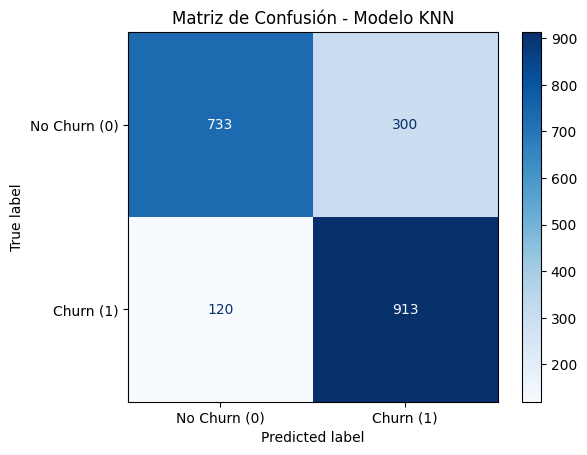


--- Evaluación del Modelo Random Forest ---
Exactitud (Accuracy) Random Forest: 0.8538
Precisión (Precision) Random Forest: 0.8673
Recall (Recall) Random Forest: 0.8354
F1-score Random Forest: 0.8511
Matriz de Confusión Random Forest:


array([[901, 132],
       [170, 863]])

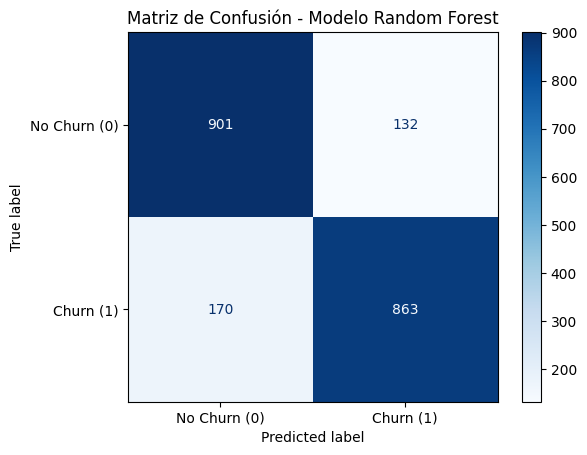

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Evaluación del modelo KNN ---
print("--- Evaluación del Modelo KNN ---")

# Predicciones en el conjunto de prueba normalizado
y_pred_knn = modelo_knn.predict(X_prueba_normalizado)

# Calcular métricas para KNN
accuracy_knn = accuracy_score(y_prueba, y_pred_knn)
precision_knn = precision_score(y_prueba, y_pred_knn)
recall_knn = recall_score(y_prueba, y_pred_knn)
f1_knn = f1_score(y_prueba, y_pred_knn)
matriz_confusion_knn = confusion_matrix(y_prueba, y_pred_knn)

print(f"Exactitud (Accuracy) KNN: {accuracy_knn:.4f}")
print(f"Precisión (Precision) KNN: {precision_knn:.4f}")
print(f"Recall (Recall) KNN: {recall_knn:.4f}")
print(f"F1-score KNN: {f1_knn:.4f}")
print("Matriz de Confusión KNN:")
display(matriz_confusion_knn)

# Visualizar la matriz de confusión para KNN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_knn, display_labels=['No Churn (0)', 'Churn (1)'])
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Modelo KNN')
plt.show()


# --- Evaluación del modelo Random Forest ---
print("\n--- Evaluación del Modelo Random Forest ---")

# Predicciones en el conjunto de prueba original
y_pred_rf = modelo_random_forest.predict(X_prueba)

# Calcular métricas para Random Forest
accuracy_rf = accuracy_score(y_prueba, y_pred_rf)
precision_rf = precision_score(y_prueba, y_pred_rf)
recall_rf = recall_score(y_prueba, y_pred_rf)
f1_rf = f1_score(y_prueba, y_pred_rf)
matriz_confusion_rf = confusion_matrix(y_prueba, y_pred_rf)

print(f"Exactitud (Accuracy) Random Forest: {accuracy_rf:.4f}")
print(f"Precisión (Precision) Random Forest: {precision_rf:.4f}")
print(f"Recall (Recall) Random Forest: {recall_rf:.4f}")
print(f"F1-score Random Forest: {f1_rf:.4f}")
print("Matriz de Confusión Random Forest:")
display(matriz_confusion_rf)

# Visualizar la matriz de confusión para Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_rf, display_labels=['No Churn (0)', 'Churn (1)'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Modelo Random Forest')
plt.show()

# Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

Importancia de las Variables en el Modelo Random Forest:


,Variable,Importancia
8,account.Charges.Total,0.095619
34,account.Contract_Month-to-month,0.091414
4,customer.tenure,0.081385
25,internet.TechSupport_No,0.080322
7,account.Charges.Monthly,0.074208
9,Cuentas_Diarias,0.072954
39,account.PaymentMethod_Electronic check,0.061395
16,internet.OnlineSecurity_No,0.056900
19,internet.OnlineBackup_No,0.030051
36,account.Contract_Two year,0.025364


/tmp/ipython-input-2293998470.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancia_rf.head(10), palette='viridis')


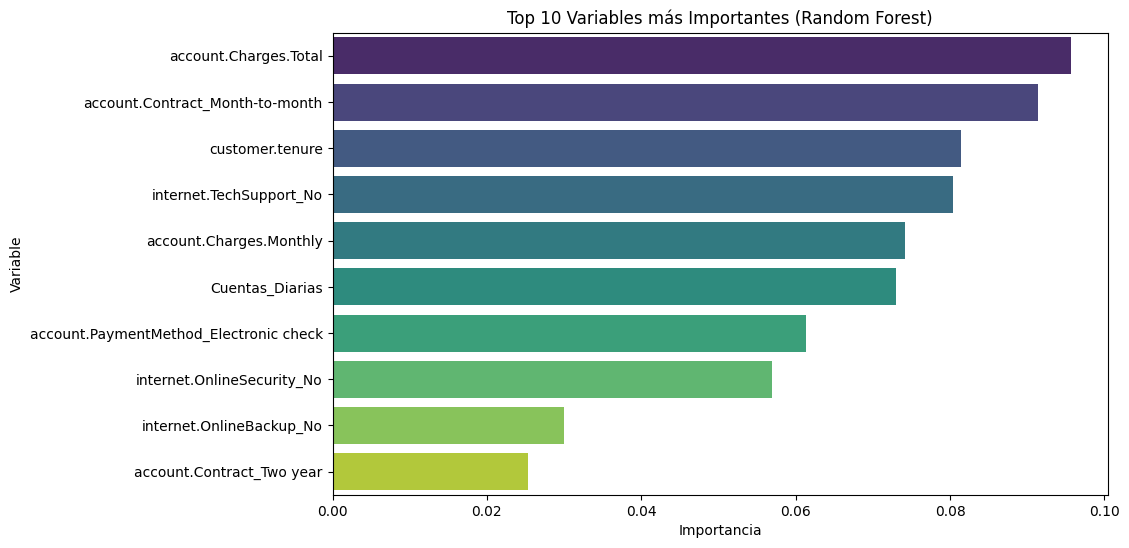

In [35]:
# Obtener la importancia de las variables del modelo Random Forest
importancia_variables_rf = modelo_random_forest.feature_importances_

# Obtener los nombres de las variables
nombres_variables = X_entrenamiento.columns

# Crear un DataFrame para visualizar la importancia de las variables
df_importancia_rf = pd.DataFrame({
    'Variable': nombres_variables,
    'Importancia': importancia_variables_rf
})

# Ordenar las variables por importancia de forma descendente
df_importancia_rf = df_importancia_rf.sort_values(by='Importancia', ascending=False)

# Mostrar las variables más importantes
print("Importancia de las Variables en el Modelo Random Forest:")
display(df_importancia_rf.head(10)) # Mostrar las 10 variables más importantes

# Opcional: Visualizar la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancia_rf.head(10), palette='viridis')
plt.title('Top 10 Variables más Importantes (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

# Conclusión Estratégica: Factores Clave en la Predicción de Cancelación (Churn)

Basándonos en el análisis exploratorio, el preprocesamiento de datos, el balanceo de clases, la evaluación de modelos y la interpretación de la importancia de las variables, podemos extraer las siguientes conclusiones estratégicas sobre los principales factores que influyen en la cancelación de clientes en Telecom X:

1.  **Tiempo de Contrato (customer.tenure):** La antigüedad del cliente en la empresa es un factor crítico. Los clientes con menos tiempo de contrato tienen una probabilidad significativamente mayor de cancelar. Esto sugiere que los esfuerzos de retención deben enfocarse especialmente en los clientes nuevos o con poca antigüedad.
2.  **Tipo de Contrato (account.Contract_Month-to-month, account.Contract_Two year):** El tipo de contrato es un predictor muy importante de *churn*. Los clientes con contratos mes a mes son mucho más propensos a cancelar en comparación con aquellos con contratos de uno o dos años. Fomentar contratos a más largo plazo podría ser una estrategia efectiva de retención.
3.  **Gasto Total (account.Charges.Total) y Gasto Mensual (account.Charges.Monthly):** Tanto el gasto total acumulado como el cargo mensual actual son variables relevantes. Clientes con menor gasto total y mayor gasto mensual (considerando la duración del contrato) tienden a cancelar más. Esto podría indicar insatisfacción con la relación costo-beneficio o problemas con el uso del servicio.
4.  **Servicio de Internet y Soporte Técnico (internet.InternetService_Fiber optic, internet.TechSupport_No):** El tipo de servicio de internet (fibra óptica) y la falta de soporte técnico son factores que aumentan la probabilidad de cancelación. Los clientes con fibra óptica que no tienen soporte técnico asociado son particularmente propensos a irse. Mejorar la calidad del servicio de fibra óptica y la disponibilidad/eficacia del soporte técnico son áreas clave para la intervención.
5.  **Método de Pago (account.PaymentMethod_Electronic check):** El uso de cheques electrónicos como método de pago también se asocia con una mayor probabilidad de *churn*. Podría ser útil investigar las razones detrás de esta correlación (por ejemplo, problemas con el proceso de pago electrónico) y ofrecer alternativas o asistencia.

**Recomendaciones Estratégicas:**

*   **Programas de Retención Temprana:** Implementar programas de fidelización o seguimiento intensivo para clientes con poca antigüedad.
*   **Promociones para Contratos a Largo Plazo:** Ofrecer incentivos para que los clientes cambien de contratos mes a mes a contratos de mayor duración.
*   **Análisis de Rentabilidad y Satisfacción:** Monitorear de cerca a los clientes con alto gasto mensual pero bajo gasto total (en relación con su antigüedad) para identificar posibles problemas de satisfacción.
*   **Mejora del Servicio y Soporte Técnico:** Priorizar la inversión en la calidad y estabilidad del servicio de fibra óptica y fortalecer el equipo de soporte técnico, especialmente para los usuarios de este servicio.
*   **Optimización del Proceso de Pago:** Investigar y abordar cualquier fricción o problema asociado con el método de pago de cheque electrónico.

En resumen, la predicción de cancelación debe enfocarse en identificar a los clientes con menor antigüedad, contratos mes a mes, alto gasto mensual, servicio de fibra óptica sin soporte técnico y aquellos que pagan con cheque electrónico, ya que estos son los grupos con mayor riesgo de *churn*. La intervención temprana y dirigida basada en estos factores clave es fundamental para la estrategia de retención de Telecom X.

**Finish task**: El análisis y modelado para la predicción de cancelación han sido completados, identificando los principales factores de riesgo y ofreciendo recomendaciones estratégicas.